In [16]:
import pandas as pd
import geopandas as gpd
import numpy as np

In [2]:
alphadf_path = "/home/anopsy/Portfolio/sourcestack/data/alpha_df.csv"
geojson_path = "/home/anopsy/Portfolio/sourcestack/data/countries.geo.json"

In [3]:
alpha_df = pd.read_csv(alphadf_path)
geo_data = gpd.read_file(geojson_path)

/tmp/ipykernel_15348/2012238204.py:1: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  alpha_df = pd.read_csv(alphadf_path)


In [5]:
alpha_grouped = alpha_df.groupby(["code"])["country"].count().reset_index()
alpha_grouped

,code,country
0,ABW,1
1,AFG,1
2,AGO,7
3,ALB,8
4,ARE,303
...,...,...
173,WLF,1
174,YEM,1
175,ZAF,774
176,ZMB,2


In [6]:
geo_df = geo_data.merge(alpha_grouped, how="right", left_on="id", right_on="code")
geo_df

,id,name,geometry,code,country
0,NaN,NaN,None,ABW,1
1,AFG,Afghanistan,"POLYGON ((61.21082 35.65007, 62.23065 35.27066...",AFG,1
2,AGO,Angola,"MULTIPOLYGON (((16.32653 -5.87747, 16.57318 -6...",AGO,7
3,ALB,Albania,"POLYGON ((20.59025 41.85540, 20.46317 41.51509...",ALB,8
4,ARE,United Arab Emirates,"POLYGON ((51.57952 24.24550, 51.75744 24.29407...",ARE,303
...,...,...,...,...,...
173,NaN,NaN,None,WLF,1
174,YEM,Yemen,"POLYGON ((53.10857 16.65105, 52.38521 16.38241...",YEM,1
175,ZAF,South Africa,"POLYGON ((31.52100 -29.25739, 31.32556 -29.401...",ZAF,774
176,ZMB,Zambia,"POLYGON ((32.75937 -9.23060, 33.23139 -9.67672...",ZMB,2


In [7]:
geo_df.drop(columns=["id", "name"], inplace=True)
geo_df

,geometry,code,country
0,None,ABW,1
1,"POLYGON ((61.21082 35.65007, 62.23065 35.27066...",AFG,1
2,"MULTIPOLYGON (((16.32653 -5.87747, 16.57318 -6...",AGO,7
3,"POLYGON ((20.59025 41.85540, 20.46317 41.51509...",ALB,8
4,"POLYGON ((51.57952 24.24550, 51.75744 24.29407...",ARE,303
...,...,...,...
173,None,WLF,1
174,"POLYGON ((53.10857 16.65105, 52.38521 16.38241...",YEM,1
175,"POLYGON ((31.52100 -29.25739, 31.32556 -29.401...",ZAF,774
176,"POLYGON ((32.75937 -9.23060, 33.23139 -9.67672...",ZMB,2


In [17]:
geo_df["log_numbers"] = np.log2(geo_df["country"])

In [9]:
import matplotlib.pyplot as plt

(array([46., 30., 18., 24., 18., 25., 12.,  3.,  1.,  1.]),
 array([ 0.        ,  1.54441414,  3.08882827,  4.63324241,  6.17765654,
         7.72207068,  9.26648481, 10.81089895, 12.35531309, 13.89972722,
        15.44414136]),
 <BarContainer object of 10 artists>)

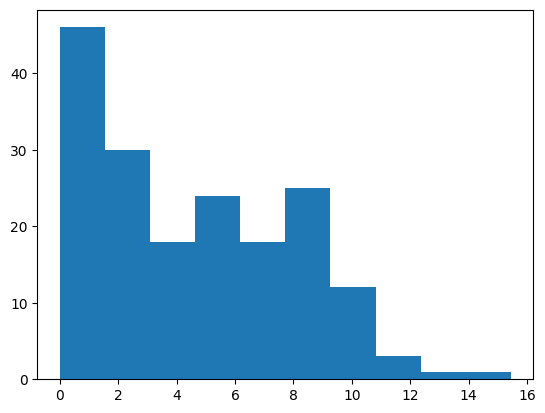

In [18]:
plt.hist(x=geo_df["log_numbers"])

In [21]:
ax = geo_df.plot(column="country", cmap="viridis", legend=True)
ax.set_title("Number of Jobs per Country")
plt.savefig("/home/anopsy/Portfolio/sourcestack/data/number_percountry")
plt.close()

In [22]:
ax = geo_df.plot(column="log_numbers", cmap="viridis", legend=True)
ax.set_title("Log of Number of Jobs per Country")
plt.savefig("/home/anopsy/Portfolio/sourcestack/data/lognumber_percountry")
plt.close()

In [ ]:
plt.savefig("/home/anopsy/Portfolio/sourcestack/data/number_percountry")